In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
dataset = pd.read_csv('tested.csv')

In [77]:
dataset.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [78]:
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [79]:
dataset.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     





### Handle missing data appropriately, considering imputation strategies




In [80]:
missing_data = dataset.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [81]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [82]:
missing_data = dataset.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [83]:
dataset.drop('Cabin', axis=1, inplace=True)

In [84]:
dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

In [85]:
missing_data = dataset.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64





### Create new features or extract useful information from existing features




In [86]:
dataset['family_size'] = dataset['SibSp'] + dataset['Parch']
dataset['Survival'] = np.where(dataset['family_size'] > 0, 'Alive', 'Dead')
print(dataset[['SibSp', 'Parch', 'family_size', 'Survival']].head())

   SibSp  Parch  family_size Survival
0      0      0            0     Dead
1      1      0            1    Alive
2      0      0            0     Dead
3      0      0            0     Dead
4      1      1            2    Alive


In [87]:
print(dataset['Sex'].unique())

['male' 'female']





### Conduct advanced grouping and aggregation to analyze survival rates based on multiple factors simultaneously




In [88]:
male_survivors = dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]
print(male_survivors)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, family_size, Survival]
Index: []


In [89]:
grouped_data_advanced = dataset.groupby(['Pclass', 'Sex', 'Embarked', 'family_size']).agg({
    'Survived': ['count', 'mean']
}).reset_index()
grouped_data_advanced.columns = ['Pclass', 'Sex', 'Embarked', 'FamilySize', 'PassengerCount', 'SurvivalRate']
print("Advanced Grouped Data:\n", grouped_data_advanced)

Advanced Grouped Data:
     Pclass     Sex Embarked  FamilySize  PassengerCount  SurvivalRate
0        1  female        C           0              12           1.0
1        1  female        C           1              11           1.0
2        1  female        C           2               4           1.0
3        1  female        C           4               1           1.0
4        1  female        Q           1               1           1.0
5        1  female        S           0               6           1.0
6        1  female        S           1               8           1.0
7        1  female        S           2               4           1.0
8        1  female        S           3               1           1.0
9        1  female        S           5               2           1.0
10       1    male        C           0              12           0.0
11       1    male        C           1              10           0.0
12       1    male        C           2               4           

In [90]:
grouped_sex_age_data = dataset.groupby(['Sex', 'Age'])['Survived'].agg(['count', 'mean']).reset_index()
grouped_sex_age_data.columns = ['Sex', 'Age_Group', 'Passenger_Count', 'Survival_Rate']
print("Grouped Data:\n", grouped_sex_age_data)


Grouped Data:
         Sex  Age_Group  Passenger_Count  Survival_Rate
0    female       0.17                1            1.0
1    female       0.92                1            1.0
2    female       1.00                3            1.0
3    female       2.00                1            1.0
4    female       3.00                1            1.0
..      ...        ...              ...            ...
112    male      61.00                2            0.0
113    male      62.00                1            0.0
114    male      63.00                1            0.0
115    male      64.00                1            0.0
116    male      67.00                1            0.0

[117 rows x 4 columns]





### Visualize the results using Matplotlib or Seaborn for effective communication.




/tmp/ipykernel_84192/3130110970.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=dataset, ci=None)


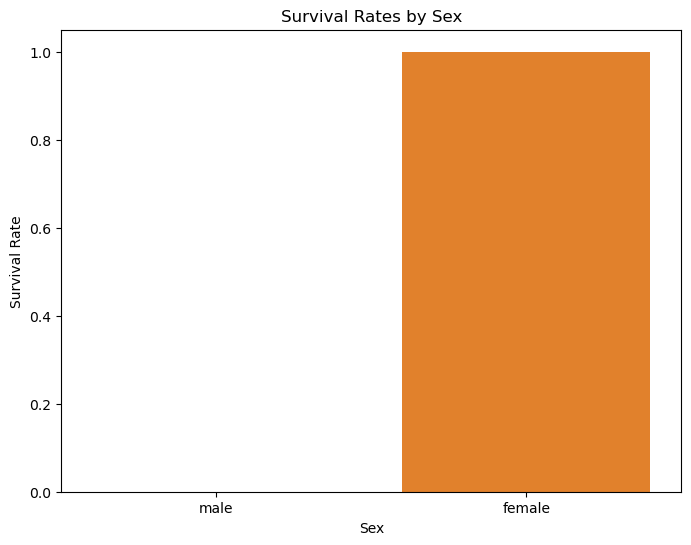

In [91]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=dataset, ci=None)
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [92]:
age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51-100']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)
grouped_age_data = dataset.groupby('Age_Group')['Survived'].agg(['count', 'mean']).reset_index()
grouped_age_data.columns = ['Age_Group', 'Passenger_Count', 'Survival_Rate']
print("Grouped Data:\n", grouped_age_data)


Grouped Data:
   Age_Group  Passenger_Count  Survival_Rate
0      0-18               41       0.414634
1     19-35              267       0.340824
2     36-50               74       0.378378
3    51-100               36       0.444444


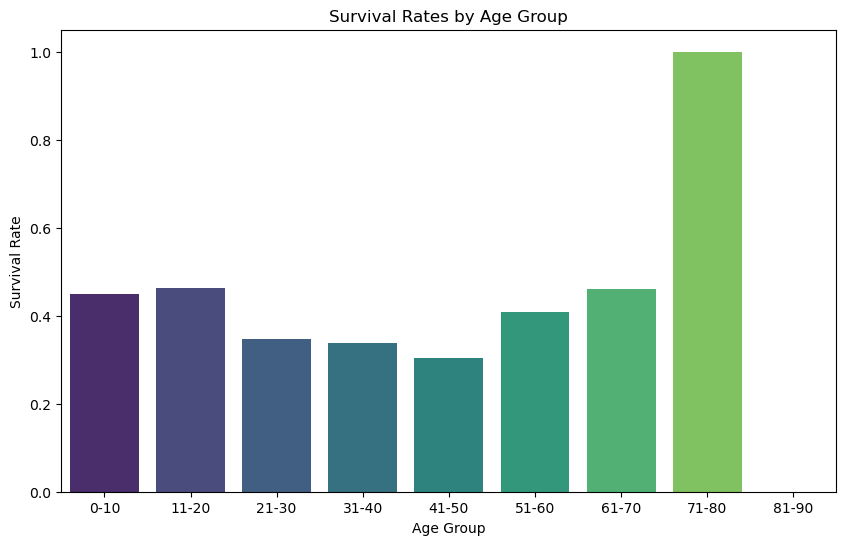

In [93]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)
grouped_age_data = dataset.groupby('AgeGroup')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=grouped_age_data, palette='viridis')
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()